# Get the dataset

## MoodyLyrics

In [1]:
# Import data from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install lyricsgenius

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.4/59.4 kB 5.3 MB/s eta 0:00:00


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from lyricsgenius import Genius
import time
import spacy
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#load dataset
df=pd.read_excel('/content/drive/MyDrive/DSW Final Project/dataset/MoodyLyrics_raw.xlsx',usecols=[1,2,3])

In [ ]:
df.head()

,Artist,Title,Mood
0,Usher,There Goes My Baby,relaxed
1,Da'Ville,On My Mind,relaxed
2,Rihanna,Rockstar 101,relaxed
3,J. Holiday,Bed,relaxed
4,Morgan Heritage,Don't Haffi Dread,angry


In [ ]:
df.shape

(2595, 3)

In [ ]:
df.describe()

,Artist,Title,Mood
count,2595,2595,2595
unique,1672,2229,4
top,The Beatles,Silent Night,happy
freq,52,24,819


In [ ]:
#Check if there is duplicates, find that the dataset has 86 duplicate rows
duplicates = df[df.duplicated()]
print(duplicates)

                 Artist                       Title     Mood
250        Eric Clapton                     Cocaine    angry
483        Mark Schultz               Love Has Come    happy
484   Sidewalk Prophets             You Can Have Me    happy
485         Josh Wilson          Before The Morning    angry
487         Jeremy Camp               Take You Back    angry
...                 ...                         ...      ...
2582          Metallica               Metal Militia      sad
2584    George Harrison                What Is Life    happy
2586        Boyz II Men                Silent Night  relaxed
2589        Sheryl Crow  A Change Would Do You Good  relaxed
2593          Sepultura                   Territory    angry

[86 rows x 3 columns]


In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(2509, 3)

In [ ]:
# mood_counts

NameError: ignored

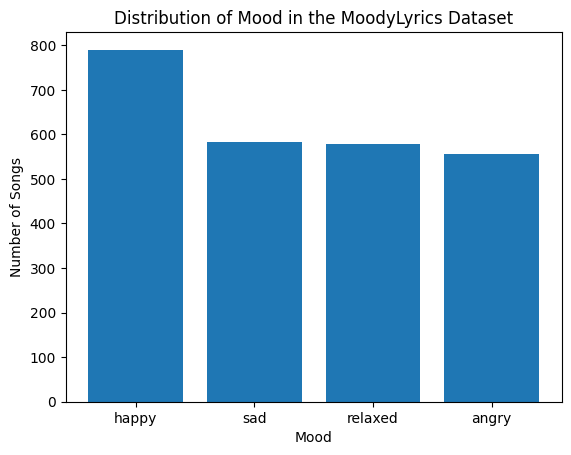

In [ ]:
#See the distribution of Mood, could see the imbalance problem
mood_counts = df['Mood'].value_counts()
plt.bar(mood_counts.index, mood_counts.values)
plt.xlabel('Mood')
plt.ylabel('Number of Songs')
plt.title('Distribution of Mood in the MoodyLyrics Dataset')
plt.show()

In [ ]:
#Choose oversampling method to balance the data
X = df.drop('Mood', axis=1)
y = df['Mood']

In [ ]:
oversampler = RandomOverSampler(random_state=42)
X_b, y_b = oversampler.fit_resample(X, y)

In [ ]:
mood_counts=y_b.value_counts()
print(mood_counts)

relaxed    790
angry      790
happy      790
sad        790
Name: Mood, dtype: int64


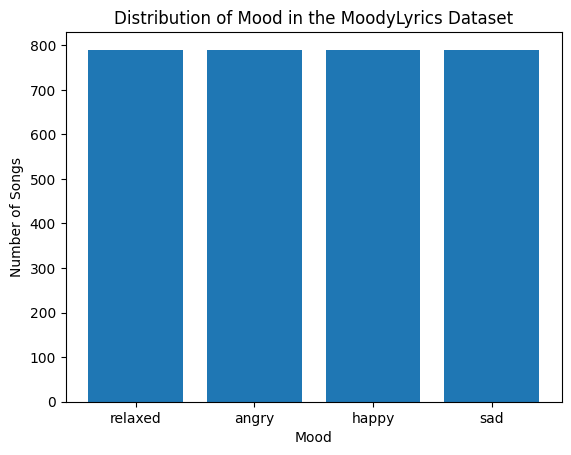

In [ ]:
plt.bar(mood_counts.index, mood_counts.values)
plt.xlabel('Mood')
plt.ylabel('Number of Songs')
plt.title('Distribution of Mood in the MoodyLyrics Dataset')
plt.show()

In [ ]:
#concat the X and y together and save it to the file
df_b = pd.concat([pd.DataFrame(X_b), pd.DataFrame(y_b, columns=['Mood'])], axis=1)
df_b.to_csv('MoodyLyrics_balance.csv', index=False)

## get the lyrics

In [ ]:

genius = Genius('kss55xPIP8bOebUuMq08mAdAPzwkQXsya9DuhDXgbZVp_qkXyKXRNFVmMNvBDc1n')

In [ ]:

def download_lyrics(artist, title):
    try:
        song = genius.search_song(title, artist)
        if song is not None:
            lyrics = song.lyrics
        else:
            lyrics = ''
    except:
        lyrics = ''
    time.sleep(5) # Add a delay to avoid overloading the API
    return lyrics

In [ ]:
lyrics = []
for index, row in df_b.iterrows():
    artist = row['Artist']
    title = row['Title']
    print('Downloading lyrics for {}-{} - {}'.format(index, artist, title))
    song_lyrics = download_lyrics(artist, title)
    lyrics.append(song_lyrics)

Searching for "There Goes My Baby" by Usher...
Searching for "On My Mind" by Da'Ville...
Searching for "Rockstar 101 " by Rihanna...
Searching for "Bed" by J. Holiday...
Searching for "Don't Haffi Dread" by Morgan Heritage...
Searching for "My Love Is Your Love" by Whitney Houston...
Searching for "Study People" by Serani...
Searching for "Spellwork" by Austra...
Searching for "Can't Let You Go" by Coro...
Searching for "Slam" by Beenie Man...
Searching for "Love Him Like I Do " by Deitrick Haddon...
Searching for "ABC" by The Jackson 5...
Searching for "The Lady In My Life" by Maysa...
Searching for "We Got Love" by Ryan Shaw...
Searching for "I Love How You Love Me" by The Paris Sisters...
Searching for "I Came To Jesus" by New Direction...
Searching for "God Great God" by Kurt Carr & The Kurt Carr Singers...
Searching for "And I Love Her" by Kenny Lattimore...
Searching for "Battlefield" by Jordin Sparks...
Searching for "You Got Yr. Cherry Bomb" by Spoon...
Searching for "Peace Of 

KeyboardInterrupt: ignored

In [ ]:
df_b['Lyrics'] = lyrics

In [ ]:
df_b.head()

In [ ]:
#find empty value
mask = df_b['Lyrics'].str.strip() == ''
empty_count = mask.sum()
print('Number of empty values in Lyrics column: {}'.format(empty_count))

In [ ]:
empty_rows = df_b.loc[mask, :][['Artist','Title']]
print(empty_rows)

In [ ]:
df_b.to_csv('MoodyLyrics_temp.csv', index=False)

## Data Cleaning

In [38]:
# 如果想直接run这一步，需要run前三步！
df_b = pd.read_csv('/content/drive/MyDrive/DSW Final Project/dataset/MoodyLyrics.csv')
# df_b = pd.read_csv('/content/drive/MyDrive/Sharing/DSW Final Project/dataset/MoodyLyrics.csv')

In [39]:
df_b.head()

,Artist,Title,Mood,Lyrics
0,Usher,There Goes My Baby,relaxed,13 ContributorsThere Goes My Baby Lyrics[Produ...
1,Da'Ville,On My Mind,relaxed,1 ContributorOn My Mind LyricsAhhhhhhhh\nYou'r...
2,Rihanna,Rockstar 101,relaxed,17 ContributorsROCKSTAR 101 Lyrics[Intro]\nI t...
3,J. Holiday,Bed,relaxed,30 ContributorsBed Lyrics[Written by The-Dream...
4,Morgan Heritage,Don't Haffi Dread,angry,"1 ContributorDon’t Haffi Dread LyricsYeah, yea..."


In [40]:
df_b.describe()
# Therefore, we can make the conclusion that there're duplicated lyrics occurs

,Artist,Title,Mood,Lyrics
count,3160,3160,3160,3085
unique,1672,2229,4,2405
top,The Beatles,Silent Night,relaxed,16 ContributorsAmong the Living Lyrics[Verse 1...
freq,36,33,790,5


In [30]:
# Remove duplicate lyrics from the "Lyrics" column
df_b['Lyrics'] = df_b['Lyrics'].drop_duplicates()


In [41]:
# Check its value afterwards
df_b.describe()

,Artist,Title,Mood,Lyrics
count,3160,3160,3160,3085
unique,1672,2229,4,2405
top,The Beatles,Silent Night,relaxed,16 ContributorsAmong the Living Lyrics[Verse 1...
freq,36,33,790,5


In [42]:
# Find out all lines where lyrics is Null
df_b[df_b['Lyrics'].isnull()]

,Artist,Title,Mood,Lyrics
20,Tarralyn Ramsey,Peace Of God,relaxed,NaN
25,Anders Osborne,Darkness At The Bottom,sad,NaN
120,Soft Cell,Tainted Love,happy,NaN
122,Cyndi Lauper,Time After Time,sad,NaN
230,Whitney Houston,I Will Always Love You,happy,NaN
...,...,...,...,...
2956,Serge Gainsbourg,Requiem Pour Un C...,sad,NaN
3034,Atreyu,Ex's And Oh's (Instrumental Version),sad,NaN
3071,Andy Palacio & The Garifuna Collective,Baba,sad,NaN
3084,Panic At The Disco,Northern Downpour (Album Version),sad,NaN


In [43]:
# Filter data to use songs that have lyrics
df_b = df_b[df_b['Lyrics'].notnull()]

In [ ]:
# # Checkout the detailed information of Lyrics
# lyrics_sample = df_b.loc[0, 'Lyrics']
# print(lyrics_sample)

### Lyrics Cleaning

In [45]:
import re
# Remove non-lyric related parts
df_b['Lyrics'] = df_b['Lyrics'].str.replace(r'\d+ Contributors', '', regex=True)
df_b['Lyrics'] = df_b['Lyrics'].str.replace(r'\d+ Contributor', '', regex=True)
df_b['Lyrics'] = df_b['Lyrics'].str.replace(r'.*Lyrics', '')
df_b['Lyrics'] = df_b['Lyrics'].str.replace(r'\[Produced by .*\]', '', regex=True)
df_b['Lyrics'] = df_b['Lyrics'].str.replace(r'See .* LiveGet tickets as low as \$\d+', '', regex=True)
df_b['Lyrics'] = df_b['Lyrics'].str.replace('You might also like', '', regex=False)
df_b['Lyrics'] = df_b['Lyrics'].str.replace('Embed', '', regex=False)

# Remove non-lyrical elements like "[Chorus]" or "[Verse 1]"
df_b['Lyrics'] = df_b['Lyrics'].str.replace(r'\[.*?\]', '', regex=True)

# Convert all the text to lowercase
df_b['Lyrics'] = df_b['Lyrics'].str.lower()

# Remove newline characters
df_b['Lyrics'] = df_b['Lyrics'].str.replace('\n', ' ', regex=False)

# Replace all non-alphabetic characters with a space
df_b['Lyrics'] = df_b['Lyrics'].apply(lambda x: re.sub(r'[^a-z\s]', '', x))

<ipython-input-45-88f4de345f3b>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_b['Lyrics'] = df_b['Lyrics'].str.replace(r'.*Lyrics', '')


In [46]:
# Remove punctuations
import string 
import re
def remove_punctuation(text):
    #translator = text.maketrans('', '', string.punctuation)
    #text = text.translate(translator)
    text = re.sub(r'\d+', '', text)  # Removes Arabic numbers
    text = re.sub(r'\n', '', text)  # Removes newline character# Remove all the words till the end of "Lyrics"
    return text

df_b['Lyrics'] = df_b['Lyrics'].apply(remove_punctuation)
print(df_b['Lyrics'])

0          yeah right usher baby okay yeah man right t...
1       ahhhhhhhh youre om my mind yea  verse im think...
2        i told ya i told ya i told ya baby baby uh uh...
3          j holiday oooh oooh ayayay ay ayayay ay aya...
4       yeah yeah yeah  ragga so ragga  you dont ha fi...
                              ...                        
3155    te sent venir como en una visin ya ests aqu y ...
3156       es difcil aceptar que me tenga que quedar a...
3157       voy a jugarme un albur con una baraja de or...
3158    ill let you in on how im feeling youve got alo...
3159    what you want you are you always were what you...
Name: Lyrics, Length: 3085, dtype: object




### Remove stopwods from the list



In [47]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
nlp = spacy.load("en_core_web_sm")

# Define function to remove stopwords
def remove_stopwords(doc):
    return ' '.join([word for word in doc.split() if word not in STOP_WORDS])

# Create a new column with the count of words before removing stopwords
df_b['Word_Count'] = df_b['Lyrics'].apply(lambda x: len(x.split()))

# Remove stopwords from the lyrics and create a new column with the count of words after removing stopwords
df_b['Lyrics_after_stopwords'] = df_b['Lyrics'].apply(remove_stopwords)
df_b['Word_Count_After'] = df_b['Lyrics_after_stopwords'].apply(lambda x: len(x.split()))

# Calculate the percentage change in the number of words
df_b['Percentage_Change'] = (df_b['Word_Count'] - df_b['Word_Count_After']) / df_b['Word_Count'] * 100

# Display the first 5 rows of the dataframe
print(df_b[['Lyrics', 'Word_Count', 'Lyrics_after_stopwords', 'Word_Count_After', 'Percentage_Change']].head())

                                              Lyrics  Word_Count  \
0     yeah right usher baby okay yeah man right t...         450   
1  ahhhhhhhh youre om my mind yea  verse im think...         132   
2   i told ya i told ya i told ya baby baby uh uh...         526   
3     j holiday oooh oooh ayayay ay ayayay ay aya...         588   
4  yeah yeah yeah  ragga so ragga  you dont ha fi...         172   

                              Lyrics_after_stopwords  Word_Count_After  \
0  yeah right usher baby okay yeah man right turn...               206   
1  ahhhhhhhh youre om mind yea verse im thinkin g...                58   
2  told ya told ya told ya baby baby uh uh told y...               372   
3  j holiday oooh oooh ayayay ay ayayay ay ayayay...               312   
4  yeah yeah yeah ragga ragga dont ha fi dread ra...               102   

   Percentage_Change  
0          54.222222  
1          56.060606  
2          29.277567  
3          46.938776  
4          40.697674  


In [48]:
# Create a DataFrame with the found information
df = df_b[['Title', 'Word_Count', 'Word_Count_After', 'Percentage_Change']]
print(df.head())

                Title  Word_Count  Word_Count_After  Percentage_Change
0  There Goes My Baby         450               206          54.222222
1          On My Mind         132                58          56.060606
2       Rockstar 101          526               372          29.277567
3                 Bed         588               312          46.938776
4   Don't Haffi Dread         172               102          40.697674


In [ ]:
# stop_words = set(stopwords.words('english'))
# # print(stop_words)
# rows = list()
# sentence_list = []

# for i, lyrics in df_b['Lyrics'].items():
#   word_tokens = word_tokenize(lyrics)
#   # converts the words in word_tokens to lower case and then checks whether 
#   #they are present in stop_words or not with lower case conversion
#   #filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
#   filtered_sentence = []
  
#   for w in word_tokens:
#       if w.lower() not in stop_words:
#           filtered_sentence.append(w)

#   n_words_before = len(word_tokens)
#   n_words_after = len(filtered_sentence)
#   if n_words_before != 0:
#     perc = (n_words_before - n_words_after) / n_words_before * 100
#   row = (df_b.loc[i, 'Title'], n_words_before, n_words_after, perc)
#   rows.append(row)
#   # print(filtered_sentence)
#   sentence_list.append(filtered_sentence)

In [ ]:
# # Create a DataFrame with the found information
# df = pd.DataFrame(rows, columns=['Title', 'Word_Count', 
#                   'Word_Count_After', 'Percentage_Change'])
# print(df.head())


                Title  Word_Count  Word_Count_After  Percentage_Change
0  There Goes My Baby         473               228          51.797040
1          On My Mind         146                63          56.849315
2       Rockstar 101          587               335          42.930153
3                 Bed         663               377          43.137255
4   Don't Haffi Dread         186               108          41.935484


In [49]:
# Print some statistics
percs = [25, 30, 40, 50, 60, 75]
print('Percentage of change in lyrics after removing stopwords:')
it = enumerate(percs)
plt_data = list()
for (i, perc) in it:
    if i == 0:
        count = len(df[df['Percentage_Change'] < perc])
        plt_data.append(('< {}'.format(perc), count))
    elif i == len(percs) - 1:
        prev_p = percs[i-1]
        count = len(df[(df['Percentage_Change'] >= prev_p) & (df['Percentage_Change'] < perc)])
        plt_data.append(('>= {} and < {}'.format(prev_p, perc), count))
        
        count = len(df[df['Percentage_Change'] >= perc])
        plt_data.append(('>= {}'.format(perc), count))
    else:
        prev_p = percs[i-1]
        count = len(df[(df['Percentage_Change'] >= prev_p) & (df['Percentage_Change'] < perc)])
        plt_data.append(('>= {} and < {}'.format(prev_p, perc), count))

pltDf = pd.DataFrame(plt_data)
print(pltDf)

Percentage of change in lyrics after removing stopwords:
                0     1
0            < 25   251
1  >= 25 and < 30    55
2  >= 30 and < 40   166
3  >= 40 and < 50   668
4  >= 50 and < 60  1283
5  >= 60 and < 75   645
6           >= 75    17


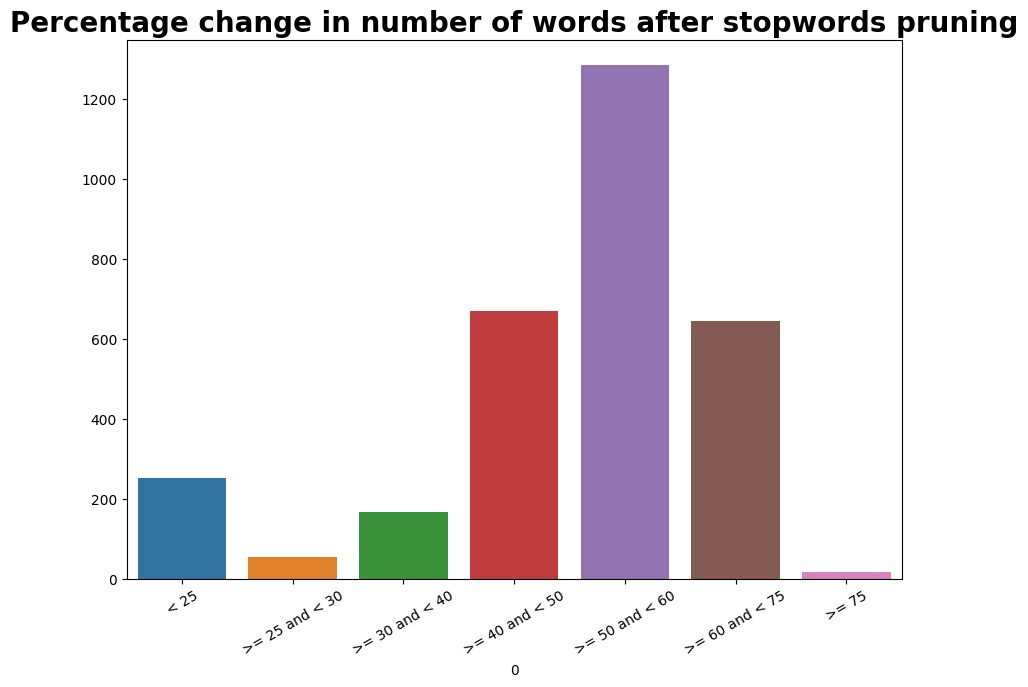

In [50]:
# Plot
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)
ax = sns.barplot(x=pltDf[0], y=pltDf[1], ax=ax)
plt.title('Percentage change in number of words after stopwords pruning', weight='bold', fontsize=20)
plt.xticks(rotation=30)
plt.ylabel('')
plt.show()

### Encode Word Counts

In [56]:
# Combine the words into sentences
# sentences = [' '.join(sentence) for sentence in sentence_list]

# Create a DataFrame with cleaned lyrics
# df_cleaned_lyrics = pd.DataFrame({'Sentences': sentences})
df_cleaned_lyrics = df_b['Lyrics_after_stopwords']
print(df_cleaned_lyrics)

0       yeah right usher baby okay yeah man right turn...
1       ahhhhhhhh youre om mind yea verse im thinkin g...
2       told ya told ya told ya baby baby uh uh told y...
3       j holiday oooh oooh ayayay ay ayayay ay ayayay...
4       yeah yeah yeah ragga ragga dont ha fi dread ra...
                              ...                        
3155    te sent venir como en una visin ya ests aqu y ...
3156    es difcil aceptar que tenga que quedar algn da...
3157    voy jugarme un albur con una baraja de oro que...
3158    ill let im feeling youve got alot nerve youll ...
3159    want want plans fall changing hands chances wi...
Name: Lyrics_after_stopwords, Length: 3085, dtype: object


In [57]:
# Concatinate the cleaned lyrics sentences with its original title
df_cleaned_lyrics = pd.concat([df_b[['Artist', 'Title', 'Mood']], df_cleaned_lyrics], axis = 1)
df_cleaned_lyrics.dropna(subset=['Lyrics_after_stopwords'], inplace=True)
df_cleaned_lyrics.head()

,Artist,Title,Mood,Lyrics_after_stopwords
0,Usher,There Goes My Baby,relaxed,yeah right usher baby okay yeah man right turn...
1,Da'Ville,On My Mind,relaxed,ahhhhhhhh youre om mind yea verse im thinkin g...
2,Rihanna,Rockstar 101,relaxed,told ya told ya told ya baby baby uh uh told y...
3,J. Holiday,Bed,relaxed,j holiday oooh oooh ayayay ay ayayay ay ayayay...
4,Morgan Heritage,Don't Haffi Dread,angry,yeah yeah yeah ragga ragga dont ha fi dread ra...


In [58]:
# This code is use to get clean data.
df_cleaned_lyrics.to_csv('MoodyLyrics_anqi_clean.csv', index=False)

In [59]:
from google.colab import files

files.download('MoodyLyrics_anqi_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

df_cleaned_lyrics: 已经clean好的数据

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(df_cleaned_lyrics['Lyrics_after_stopwords'])
print(X_train_counts.shape)

word_count_df = pd.DataFrame(X_train_counts.toarray())
word_count_df = word_count_df.add_prefix('word_count_')

# Concat cleaned lyrics with word count
df_word_count = pd.concat([df_cleaned_lyrics, word_count_df], axis=1)

(3085, 46699)


In [61]:
df_word_count.head()

,Artist,Title,Mood,Lyrics_after_stopwords,word_count_0,word_count_1,word_count_2,word_count_3,word_count_4,word_count_5,...,word_count_46689,word_count_46690,word_count_46691,word_count_46692,word_count_46693,word_count_46694,word_count_46695,word_count_46696,word_count_46697,word_count_46698
0,Usher,There Goes My Baby,relaxed,yeah right usher baby okay yeah man right turn...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Da'Ville,On My Mind,relaxed,ahhhhhhhh youre om mind yea verse im thinkin g...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Rihanna,Rockstar 101,relaxed,told ya told ya told ya baby baby uh uh told y...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,J. Holiday,Bed,relaxed,j holiday oooh oooh ayayay ay ayayay ay ayayay...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Morgan Heritage,Don't Haffi Dread,angry,yeah yeah yeah ragga ragga dont ha fi dread ra...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Encode TF-IDF

In [62]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(df_cleaned_lyrics['Lyrics_after_stopwords'])

tf_idf_word_count_df = pd.DataFrame(X_train_tfidf.toarray())
tf_idf_word_count_df = tf_idf_word_count_df.add_prefix('tf_idf_word_count_')

# Concat cleaned lyrics & word counts with encoded TF-IDF
df_wc_tfidf = pd.concat([df_word_count, tf_idf_word_count_df], axis=1)


In [63]:
df_wc_tfidf.head()

,Artist,Title,Mood,Lyrics_after_stopwords,word_count_0,word_count_1,word_count_2,word_count_3,word_count_4,word_count_5,...,tf_idf_word_count_46689,tf_idf_word_count_46690,tf_idf_word_count_46691,tf_idf_word_count_46692,tf_idf_word_count_46693,tf_idf_word_count_46694,tf_idf_word_count_46695,tf_idf_word_count_46696,tf_idf_word_count_46697,tf_idf_word_count_46698
0,Usher,There Goes My Baby,relaxed,yeah right usher baby okay yeah man right turn...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Da'Ville,On My Mind,relaxed,ahhhhhhhh youre om mind yea verse im thinkin g...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Rihanna,Rockstar 101,relaxed,told ya told ya told ya baby baby uh uh told y...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,J. Holiday,Bed,relaxed,j holiday oooh oooh ayayay ay ayayay ay ayayay...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Morgan Heritage,Don't Haffi Dread,angry,yeah yeah yeah ragga ragga dont ha fi dread ra...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


bag of words

In [64]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
X_train_bow = count_vectorizer.fit_transform(df_cleaned_lyrics['Lyrics_after_stopwords'])

bow_df = pd.DataFrame(X_train_bow.toarray())
bow_df = bow_df.add_prefix('bow_')


In [65]:
# Concat cleaned lyrics with Bag of Words
df_bow = pd.concat([df_cleaned_lyrics, bow_df], axis=1)

# %%
df_bow.head()

,Artist,Title,Mood,Lyrics_after_stopwords,bow_0,bow_1,bow_2,bow_3,bow_4,bow_5,...,bow_46689,bow_46690,bow_46691,bow_46692,bow_46693,bow_46694,bow_46695,bow_46696,bow_46697,bow_46698
0,Usher,There Goes My Baby,relaxed,yeah right usher baby okay yeah man right turn...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Da'Ville,On My Mind,relaxed,ahhhhhhhh youre om mind yea verse im thinkin g...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Rihanna,Rockstar 101,relaxed,told ya told ya told ya baby baby uh uh told y...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,J. Holiday,Bed,relaxed,j holiday oooh oooh ayayay ay ayayay ay ayayay...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Morgan Heritage,Don't Haffi Dread,angry,yeah yeah yeah ragga ragga dont ha fi dread ra...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


PCA

In [66]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [67]:
# Extract only the feature columns for PCA
features = df_wc_tfidf.drop(['Artist', 'Title', 'Mood', 'Lyrics_after_stopwords'], axis=1)

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [69]:
# Set the number of components for PCA
n_components = 2  # You can choose any number of components

# Create a PCA object
pca = PCA(n_components=n_components)

# Fit and transform the standardized features
principal_components = pca.fit_transform(scaled_features)

# Create a DataFrame with principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC{}'.format(i+1) for i in range(n_components)])

# Concatenate the Sentences column with the principal components DataFrame
final_df = pd.concat([df_cleaned_lyrics['Lyrics_after_stopwords'], principal_df], axis=1)

ValueError: ignored

In [ ]:
explained_variance = pca.explained_variance_ratio_
print("Explained variance by the first {} components: {}".format(n_components, sum(explained_variance)))

Explained variance by the first 2 components: 0.16906714683973206


word embeddings

In [ ]:
!pip install -U gensim
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

# Download the GloVe model
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

# Convert the GloVe model to Word2Vec format
glove_input_file = 'glove.6B.300d.txt'
word2vec_output_file = 'glove.6B.300d.word2vec.txt'
glove2word2vec(glove_input_file, word2vec_output_file)

# Load the Word2Vec format GloVe model
embedding_model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)


NotImplementedError: ignored

In [ ]:
import numpy as np

def get_average_glove_vector(sentence_list, model):
    avg_vectors = []
    for words in sentence_list:
        word_vectors = [model.get_vector(word) for word in words if word in model]
        if len(word_vectors) == 0:
            avg_vector = np.zeros(300)
        else:
            avg_vector = np.mean(word_vectors, axis=0)
        avg_vectors.append(avg_vector)
    return avg_vectors

embedding_vectors = get_average_glove_vector(sentence_list, embedding_model)
embedding_df = pd.DataFrame(embedding_vectors)
embedding_df = embedding_df.add_prefix('embedding_')

In [ ]:
# Concat cleaned lyrics with Word Embeddings
df_embedding = pd.concat([df_cleaned_lyrics, embedding_df], axis=1)

df_embedding.head()

emotion analysis

In [ ]:
!pip install text2emotion
import text2emotion as te

!pip uninstall -y emoji
!pip install emoji==0.6.0


In [ ]:
def get_emotion_features(text):
    emotions = te.get_emotion(text)
    return pd.Series(emotions)

emotion_df = df_cleaned_lyrics['Sentences'].apply(get_emotion_features)
emotion_df = emotion_df.add_prefix('emotion_')

In [ ]:
# Concat cleaned lyrics with Emotion Analysis
df_emotion = pd.concat([df_cleaned_lyrics, emotion_df], axis=1)

df_emotion.head()

In [ ]:
df_combined_features = pd.concat([df_word_count, bow_df, tf_idf_word_count_df, embedding_df, emotion_df], axis=1)
df_combined_features.head()

k-means

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

In [ ]:
X = df_wc_tfidf.drop(['Artist', 'Title', 'Mood', 'Sentences'], axis=1)

inertia_values = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia_values)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_clusters = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


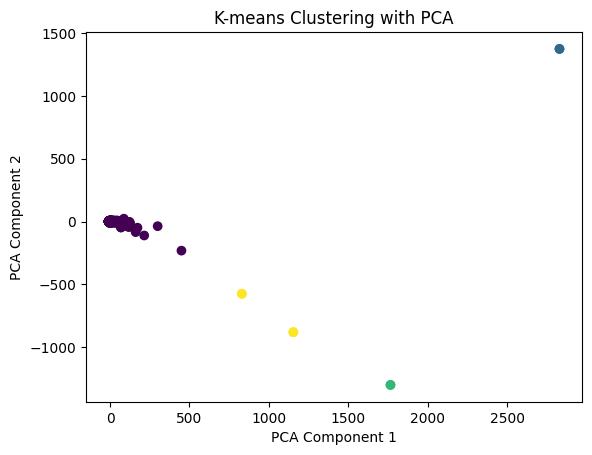

In [ ]:
# Use PCA to reduce dimensionality for visualization purposes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_clusters, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering with PCA')
plt.show()

sentiment analysis

In [ ]:
from textblob import TextBlob

def extract_sentiment_and_custom_features(lyrics):
    blob = TextBlob(lyrics)
    
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    
    avg_word_len = sum(len(word) for word in blob.words) / len(blob.words) if len(blob.words) > 0 else 0
    lexical_diversity = len(set(blob.words)) / len(blob.words) if len(blob.words) > 0 else 0
    
    return sentiment_polarity, sentiment_subjectivity, avg_word_len, lexical_diversity

In [ ]:
sentiment_polarity = []
sentiment_subjectivity = []
avg_word_len = []
lexical_diversity = []

for lyrics in df_b['Lyrics']:
    s_polarity, s_subjectivity, avg_len, lex_div = extract_sentiment_and_custom_features(lyrics)
    
    sentiment_polarity.append(s_polarity)
    sentiment_subjectivity.append(s_subjectivity)
    avg_word_len.append(avg_len)
    lexical_diversity.append(lex_div)

df_b['sentiment_polarity'] = sentiment_polarity
df_b['sentiment_subjectivity'] = sentiment_subjectivity
df_b['avg_word_len'] = avg_word_len
df_b['lexical_diversity'] = lexical_diversity

In [ ]:
df_b.head()